# Policy iteration

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
deterministic_env = gym.make('FrozenLake-v1', is_slippery=False)

In [3]:
deterministic_env.observation_space

Discrete(16)

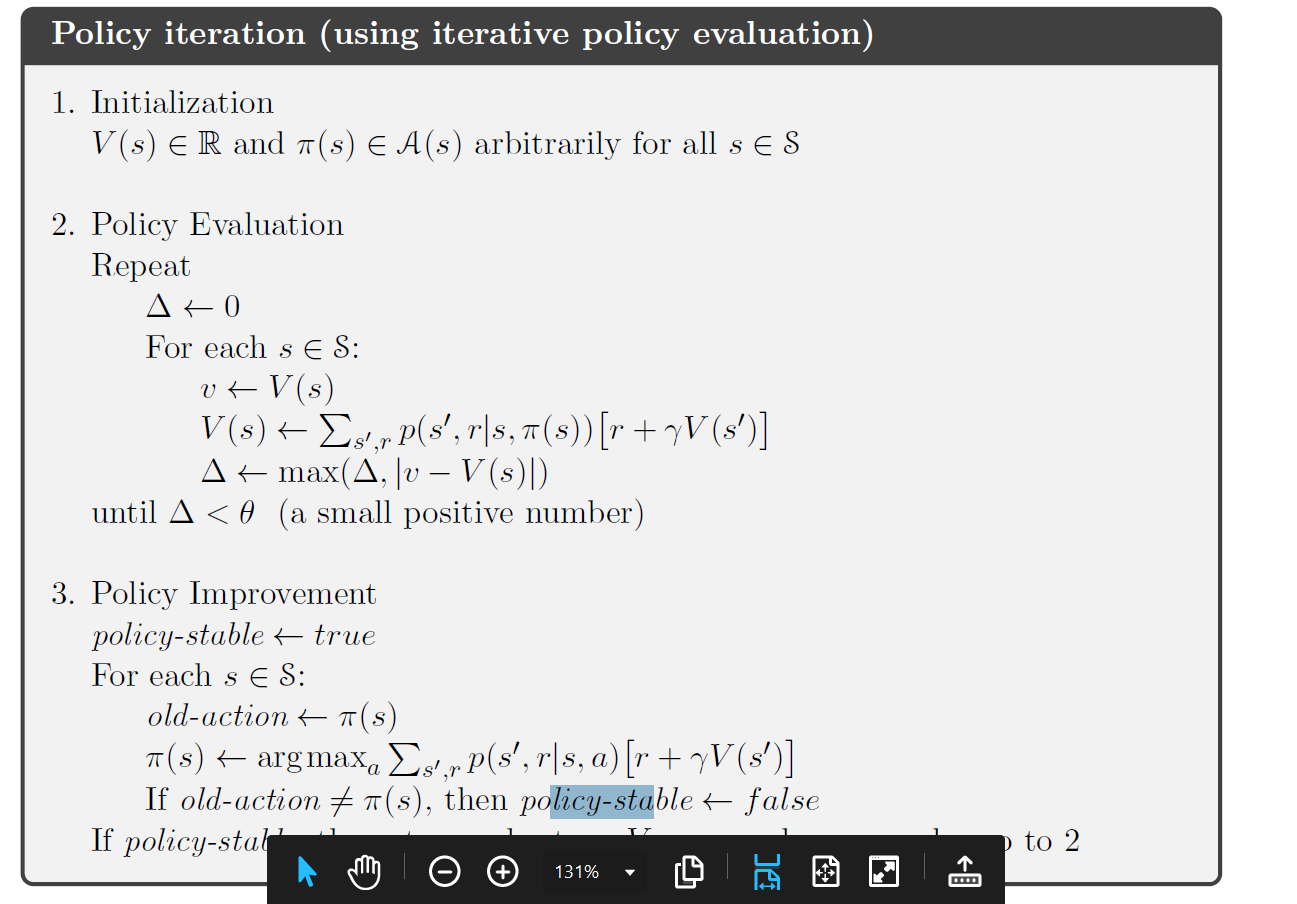

0  1   2   3
4  5   6   7
8  9  10  11
12 13 14  15

0 - left
1 - down
2 - right
3 - up

In [4]:
deterministic_env.reset()
deterministic_env.render()


SFFF
FHFH
FFFH
HFFG


In [5]:
s_p = np.array([
    [0,4,1,0], #0
    [0,5,2,1], #1
    [1,6,3,2], #2
    [2,7,3,3], #3
    [4,8,5,0], #4
    [-1,-1,-1,-1], #5
    [5,10,7,2], #6
    [-1,-1,-1,-1], #7
    [8,12,9,4], #8
    [8,13,10,5], #9
    [9,14,11,6], #10
    [-1,-1,-1,-1], #11
    [-1,-1,-1,-1], #12
    [12,13,14,9], #13
    [13,14,15,10], #14
    [-1,-1,-1,-1], #15
])
s_p[0,1]

4

In [6]:
r = np.zeros([16,4])
r[14,2] = 1

## Deterministic Policy Iteration

In [7]:
V = np.abs(np.random.normal(0,1e-1,size= 16))
pi = np.random.choice(4,size=16)
GAMMA = 0.9
pi

array([0, 3, 2, 0, 2, 1, 0, 1, 2, 3, 1, 2, 0, 3, 1, 3])

In [8]:
for it in range(1000):

    # policy evaluation
    for _ in range(1000):
        Delta = 0
        for s in range(16):
            v = V[s].copy()
            V[s] = r[s,pi[s]] + GAMMA*V[s_p[s,pi[s]]]
            Delta = max(Delta, np.abs(v-V[s]))
        if Delta < 1e-2:
            break

    # policy improvement
    policy_stable = True
    for s in range(16):
        old_action = pi[s].copy()
        pi[s] = np.argmax([r[s,a] + GAMMA*V[s_p[s,a]] for a in range(4)])
        if old_action != pi[s]:
            policy_stable = False
    if policy_stable:
        break

### Testing

In [9]:
pi

array([1, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 2, 0])

In [10]:
observation = deterministic_env.reset()
done = False
deterministic_env.render()
while not done:
    action = pi[observation]
    observation, reward, done, info = deterministic_env.step(action)
    deterministic_env.render()

if reward:
    print("Reached GOAL!!!")
else:
    print("Fell into hole ):")


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
Reached GOAL!!!


## Probabilistic Policy Iteration

In [11]:
probabilistic_env = gym.make('FrozenLake-v1', is_slippery=True)

In [12]:
probabilistic_env.P

{0: {0: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  2: [(0.3333333333333333, 4, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)],
  3: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 1: {0: [(0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True)],
  1: [(0.3333333333333333, 0, 0.0, False),
   (0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False)],
  2: [(0.3333333333333333, 5, 0.0, True),
   (0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False)],
  3: [(0.3333333333333333, 2, 0.0, False),
   (0.3333333333333333, 1, 0.0, False),
   (0.3333333333333333, 0, 0.0, False)]},
 2:

In [13]:
V = np.abs(np.random.normal(0,1e-1,size= 16))
pi = np.random.choice(4,size=16)
GAMMA = 0.9
pi

array([3, 1, 0, 1, 0, 3, 1, 2, 0, 0, 2, 1, 0, 1, 0, 2])

In [14]:
for it in range(1000):

    # policy evaluation
    for _ in range(1000):
        Delta = 0
        for s in range(16):
            v = V[s].copy()
            V[s] = sum(el[0]*(el[2] + GAMMA*V[el[1]]) for el in probabilistic_env.P[s][pi[s]])
            Delta = max(Delta, np.abs(v-V[s]))
        if Delta < 1e-2:
            break

    # policy improvement
    policy_stable = True
    for s in range(16):
        old_action = pi[s].copy()
        pi[s] = np.argmax([sum(el[0]*(el[2] + GAMMA*V[el[1]]) for el in probabilistic_env.P[s][a]) for a in range(4)])
        if old_action != pi[s]:
            policy_stable = False
    if policy_stable:
        break

### Testing

In [15]:
pi

array([1, 3, 2, 3, 0, 0, 0, 0, 3, 1, 0, 0, 0, 2, 1, 0])

In [16]:
observation = probabilistic_env.reset()
done = False
probabilistic_env.render()
while not done:
    action = pi[observation]
    observation, reward, done, info = probabilistic_env.step(action)
    probabilistic_env.render()

if reward:
    print("Reached GOAL!!!")
else:
    print("Fell into hole ):")


SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Reached GOAL!!!
